In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from math import log2, log10, ceil

In [3]:
matplotlib.rcParams["font.size"] = 20

def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(ax, f, C=1, color="k", label="work"):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series()
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color, linewidth=3, label=label)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')
    
def upper_bound(ax, order, C=1, minN=None):
    f = order
    if C != 1:
        f = "C * (%s)" % order
    plot_func(ax, f, C=C, color="r", label="upper bound")
    if minN != None:
        ax.axvspan(minN, ax.get_xlim()[1], color='0.85')
    ax.legend(frameon=False)

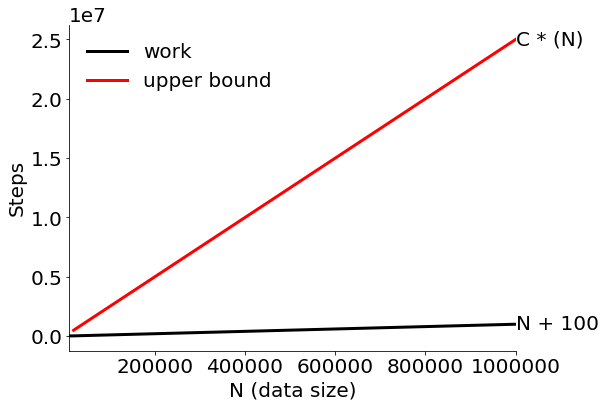

In [9]:
#Exercise 1
ax = scale_ax()
ax.set_xlim(0, 10) # TODO: change upper bound

ax.set_xlim(0, 1e6) # 1 million

plot_func(ax, "N + 100")

#upper_bound(ax, order="N") # TODO: pass C and minN



upper_bound(ax, order="N", C=25)


None

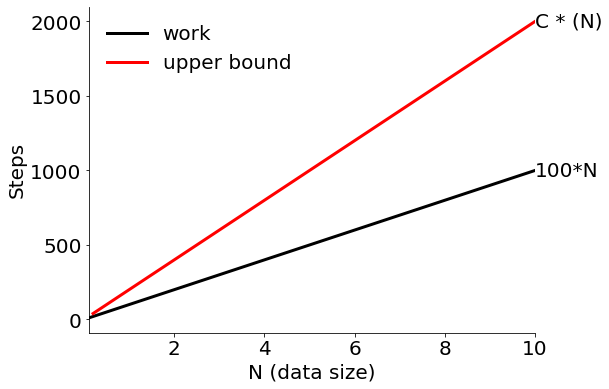

In [11]:
#Exercise2
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "100*N")

upper_bound(ax, order="N", C=200)

#The good C can be 200

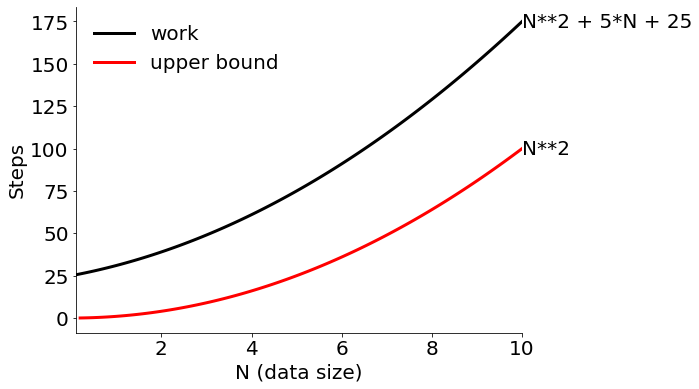

In [12]:
#Exercise 3
ax = scale_ax()

ax.set_xlim(0, 10)

plot_func(ax, "N**2 + 5*N + 25")

upper_bound(ax, order="N**2")

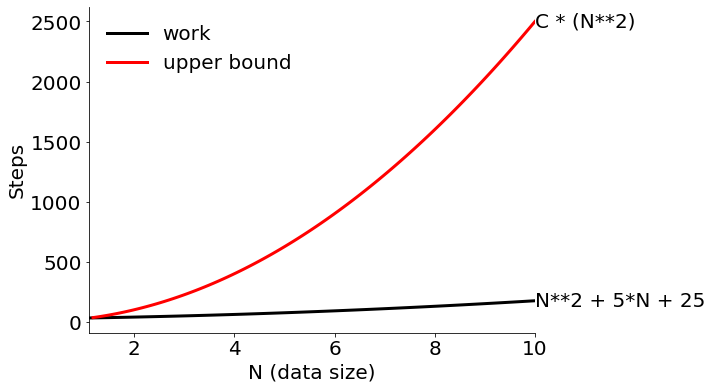

In [13]:
ax = scale_ax()

ax.set_xlim(1, 10)

plot_func(ax, "N**2 + 5*N + 25")

upper_bound(ax, order="N**2", C=25)

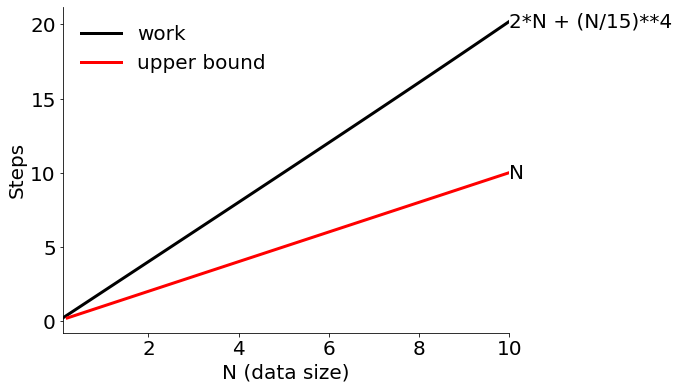

In [15]:
#Exercise 4
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N")

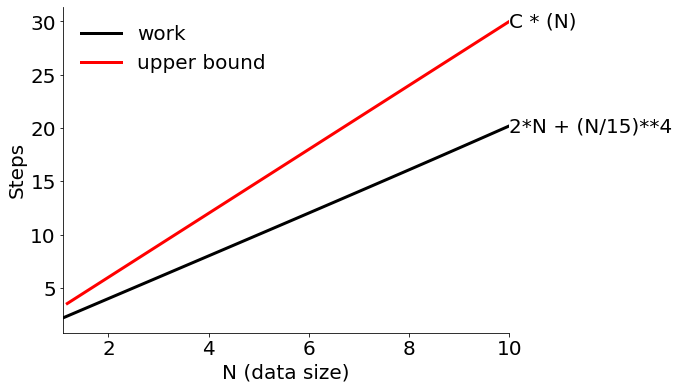

In [17]:
ax = scale_ax()
ax.set_xlim(1, 10)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N", C = 3)

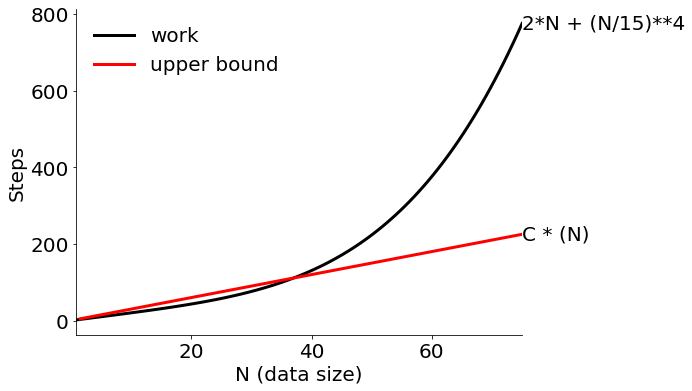

In [18]:
ax = scale_ax()
ax.set_xlim(0, 75)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N", C = 3)

#The 2*N + (N/15)**4 should be forth order

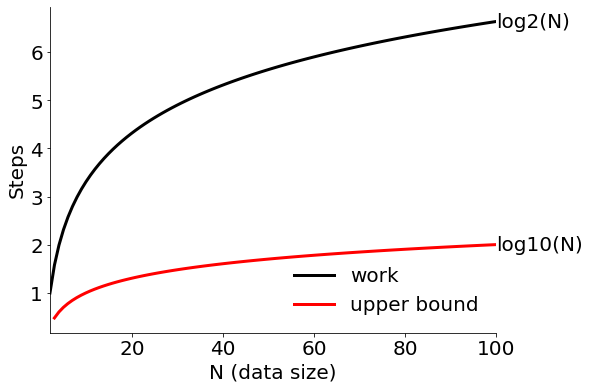

In [19]:
#Exercise 5
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "log2(N)")

upper_bound(ax, order="log10(N)")

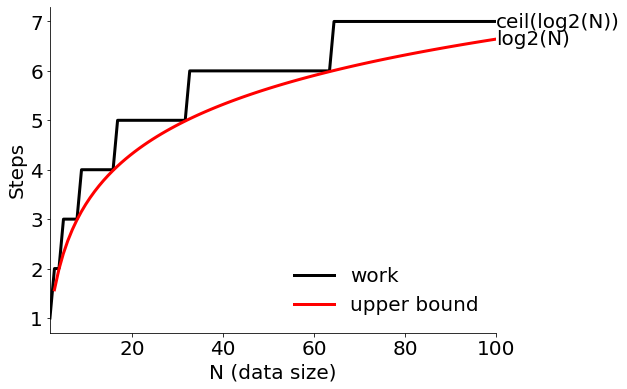

In [20]:
#Exercise 6
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "ceil(log2(N))")

upper_bound(ax, order="log2(N)")

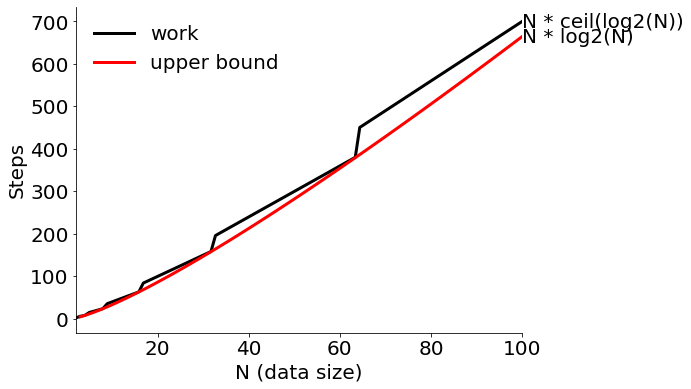

In [21]:
#Exercise 7
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)")

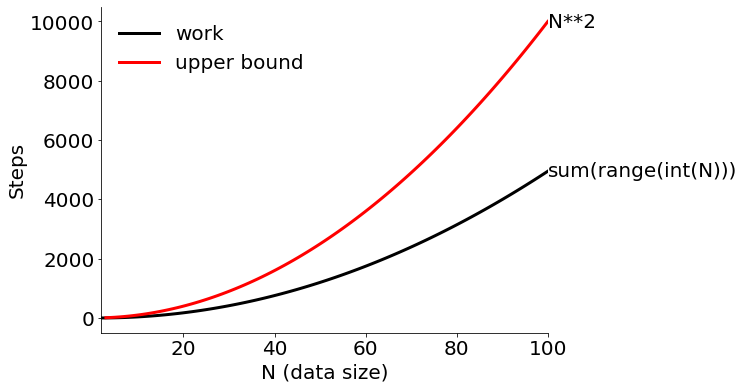

In [22]:
#Exercise 8
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "sum(range(int(N)))")

upper_bound(ax, order='N**2')